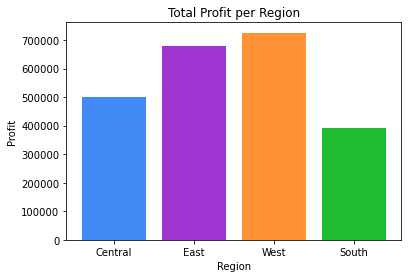

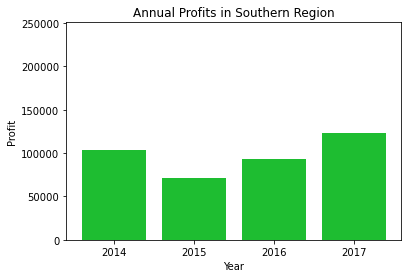

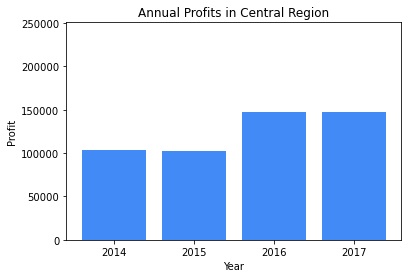

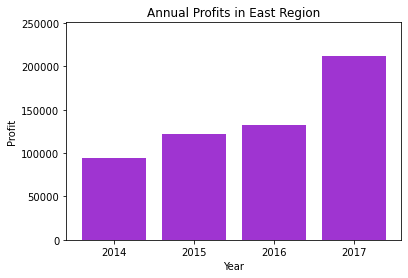

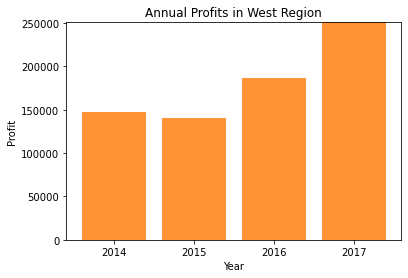

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('store_data.csv', encoding = "ISO-8859-1")

df_south = df[(df["Region"]=="South")].copy()
df_central = df[(df["Region"]=="Central")].copy()
df_east = df[(df["Region"]=="East")].copy()
df_west = df[(df["Region"]=="West")].copy()

south_total = df_south["Sales"].sum()
central_total = df_central["Sales"].sum()
east_total = df_east["Sales"].sum()
west_total = df_west["Sales"].sum()

totals = np.array([central_total, east_total, west_total, south_total])
totals_xlabels = np.array(["Central", "East", "West", "South"])

plt.title("Total Profit per Region")
colors = ['#428af5', '#9f34d1', '#ff9336', '#1ebd31']
plt.bar(totals_xlabels, totals, color=colors)
plt.xlabel("Region")
plt.ylabel("Profit")

plt.show()

plt.clf()

def vector_slice(a,start,end):
    b = a.view((str,1)).reshape(len(a),-1)[:,start:end]
    return b
    
south_oid = df_south["Order ID"].to_numpy(dtype = str)
central_oid = df_central["Order ID"].to_numpy(dtype = str)
east_oid = df_central["Order ID"].to_numpy(dtype = str)
west_oid = df_west["Order ID"].to_numpy(dtype = str)

south_oid = vector_slice(south_oid, 3, 7).astype(np.int64)
central_oid = vector_slice(central_oid, 3, 7).astype(np.int64)
east_oid = vector_slice(east_oid, 3, 7).astype(np.int64)
west_oid = vector_slice(west_oid, 3, 7).astype(np.int64)

def flatten_oid(a):
    b = np.zeros(a.shape[0])
    for i in range(a.shape[0]):
        b[i] = 10**3 * a[i][0] + 10**2 * a[i][1] + 10**1 * a[i][2] + 10**0 * a[i][3]
    return b.astype(np.int64)

south_oid = flatten_oid(south_oid)
central_oid = flatten_oid(central_oid)
east_oid = flatten_oid(east_oid)
west_oid = flatten_oid(west_oid)

south_years = np.unique(south_oid)
central_years = np.unique(central_oid)
east_years = np.unique(east_oid)
west_years = np.unique(west_oid)

south_profit = df_south["Sales"].to_numpy()
central_profit = df_central["Sales"].to_numpy()
east_profit = df_east["Sales"].to_numpy()
west_profit = df_west["Sales"].to_numpy()

def profit_per_year(profit, oid, years):
    a = np.zeros_like(years, dtype="double")
    for i in range(oid.shape[0]):
        year = oid[i] - years.min()
        a[year] += profit[i]
    return a

south_profit_per_year = profit_per_year(south_profit, south_oid, south_years)
central_profit_per_year = profit_per_year(central_profit, central_oid, central_years)
east_profit_per_year = profit_per_year(east_profit, east_oid, east_years)
west_profit_per_year = profit_per_year(west_profit, west_oid, west_years)

max_annual_profits = np.zeros(4)
max_annual_profits[0] = south_profit_per_year.max()
max_annual_profits[1] = central_profit_per_year.max()
max_annual_profits[3] = east_profit_per_year.max()
max_annual_profits[2] = west_profit_per_year.max()
max_annual_profit = max_annual_profits.max()

plt.title("Annual Profits in Southern Region")
plt.bar(south_years.astype(str), south_profit_per_year, color = colors[3])
plt.xlabel("Year")
plt.ylabel("Profit")
plt.ylim(top = max_annual_profit)
plt.show()
plt.clf()

plt.title("Annual Profits in Central Region")
plt.bar(south_years.astype(str), central_profit_per_year, color = colors[0])
plt.xlabel("Year")
plt.ylabel("Profit")
plt.ylim(top = max_annual_profit)
plt.show()
plt.clf()

plt.title("Annual Profits in Eastern Region")
plt.bar(south_years.astype(str), east_profit_per_year, color = colors[1])
plt.xlabel("Year")
plt.ylabel("Profit")
plt.ylim(top = max_annual_profit)
plt.show()
plt.clf()

plt.title("Annual Profits in Western Region")
plt.bar(south_years.astype(str), west_profit_per_year, color = colors[2])
plt.xlabel("Year")
plt.ylabel("Profit")
plt.ylim(top = max_annual_profit)
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>